In [71]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from EngbertMicrosaccadeToolbox import microsac_detection

In [72]:
# Set parameters
SAMPLING = 500
MINDUR = 3
VFAC = 5

## Read raw data (ASCII; subject 01, trial 005)

In [73]:
d = pd.read_csv("data/f01.005.dat", sep="\t", header=None, names=["t", "x_l", "y_l", "x_r", "y_r"])
d.head()
d = d.loc[3000:4499]
d.head()

,t,x_l,y_l,x_r,y_r
3000,6000.0,0.01188,0.60588,-0.21384,0.41976
3001,6002.0,0.02376,0.61380,-0.20988,0.41580
3002,6004.0,0.02772,0.62172,-0.19800,0.41976
3003,6006.0,0.03564,0.71280,-0.20196,0.41184
3004,6008.0,0.06336,0.64152,-0.20196,0.42372


In [74]:
right_eye = np.vstack([np.asarray(d.x_r), np.asarray(d.y_r)]).T
left_eye = np.vstack([np.asarray(d.x_l), np.asarray(d.y_l)]).T


## Detect

In [75]:
ms_r, rad_r = microsac_detection.microsacc(right_eye)
ms_l, rad_l = microsac_detection.microsacc(left_eye)

In [76]:
bino, monol, monor = microsac_detection.binsacc(ms_r, ms_l)

## Turn into Pandas table

In [77]:
bino = pd.DataFrame(bino, columns=["onset_l", "end_l", "peakvelocity_l", "horizontalcomponent_l", "verticalcomponent_l","horizontalamplitude_l", "verticalamplitude_l", "onset_r", "end_r", "peakvelocity_r", "horizontalcomponent_r", "verticalcomponent_r","horizontalamplitude_r", "verticalamplitude_r"])

## Make the ms-level table contain some saccade information

In [78]:
d = d.reset_index(drop=True).reset_index(names=["t_real"])
d

,t_real,t,x_l,y_l,x_r,y_r
0,0,6000.0,0.01188,0.60588,-0.21384,0.41976
1,1,6002.0,0.02376,0.61380,-0.20988,0.41580
2,2,6004.0,0.02772,0.62172,-0.19800,0.41976
3,3,6006.0,0.03564,0.71280,-0.20196,0.41184
4,4,6008.0,0.06336,0.64152,-0.20196,0.42372
...,...,...,...,...,...,...
1495,1495,8990.0,-0.05148,0.28512,-0.07920,-0.05148
1496,1496,8992.0,-0.04752,0.28908,-0.06336,-0.04356
1497,1497,8994.0,-0.07524,0.29700,-0.07524,-0.04752
1498,1498,8996.0,-0.05544,0.29700,-0.08316,-0.03960


In [79]:
a = microsac_detection.smoothdata(right_eye)
d["xrs"],d["yrs"] = a[:,0], a[:,1]
a = microsac_detection.smoothdata(left_eye)
d["xls"],d["yls"] = a[:,0], a[:,1]


In [80]:
d["sac"] = 0
for idx, row in bino.iterrows():
  d.loc[(d["t_real"]>=row["onset_l"]) & (d["t_real"]<=row["end_l"]), "sac"] = 1

## Plot Saccade data

Text(0.5, 1.0, 'Right Eye')

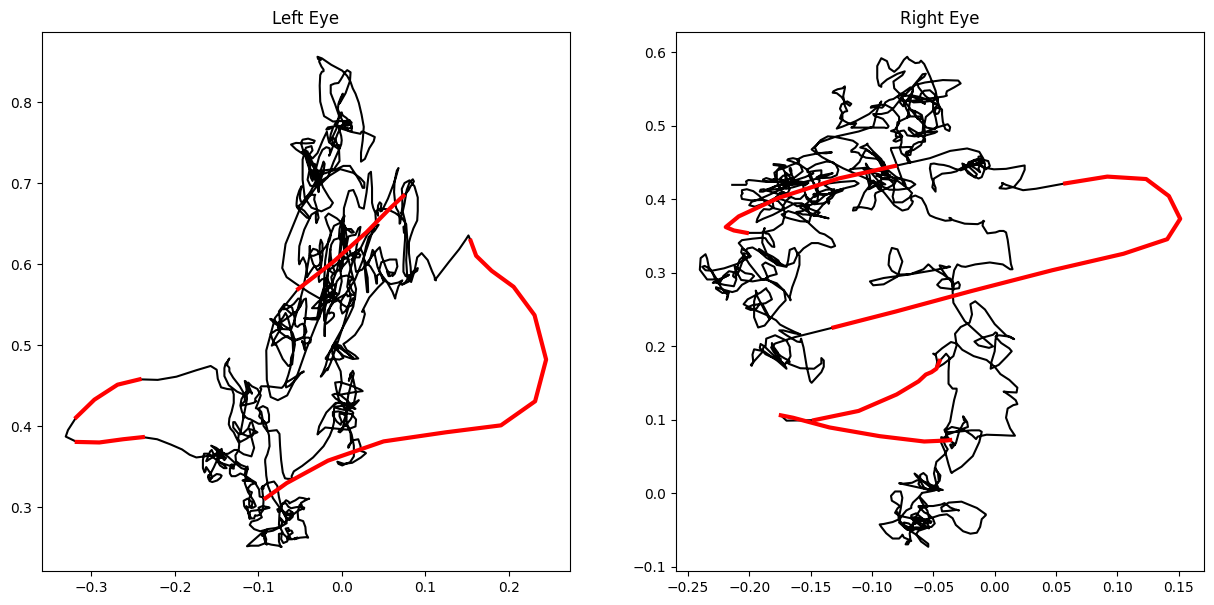

In [81]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(d.xls, d.yls, c="black")
for idx, row in bino.iterrows():
  temp = d.loc[(d["t_real"]>=row["onset_l"]) & (d["t_real"]<=row["end_l"])]
  ax[0].plot(temp.xls, temp.yls, c="red", linewidth=3)
ax[0].set_title("Left Eye")
  
ax[1].plot(d.xrs, d.yrs, c="black")
for idx, row in bino.iterrows():
  temp = d.loc[(d["t_real"]>=row["onset_r"]) & (d["t_real"]<=row["end_r"])]
  ax[1].plot(temp.xrs, temp.yrs, c="red", linewidth=3)
ax[1].set_title("Right Eye")

## Prepare data for velocity space

In [82]:
a = microsac_detection.vecvel(left_eye, 500)
d["v_xl"],d["v_yl"] = a[:,0], a[:,1]

In [83]:
phi = np.linspace(0,2*np.pi, 300)
cx = rad_l[0]*np.cos(phi)
cy = rad_l[1]*np.sin(phi)
#lines(cx,cy,lty=2)

## Plot

Text(0.5, 1.0, 'Velocity')

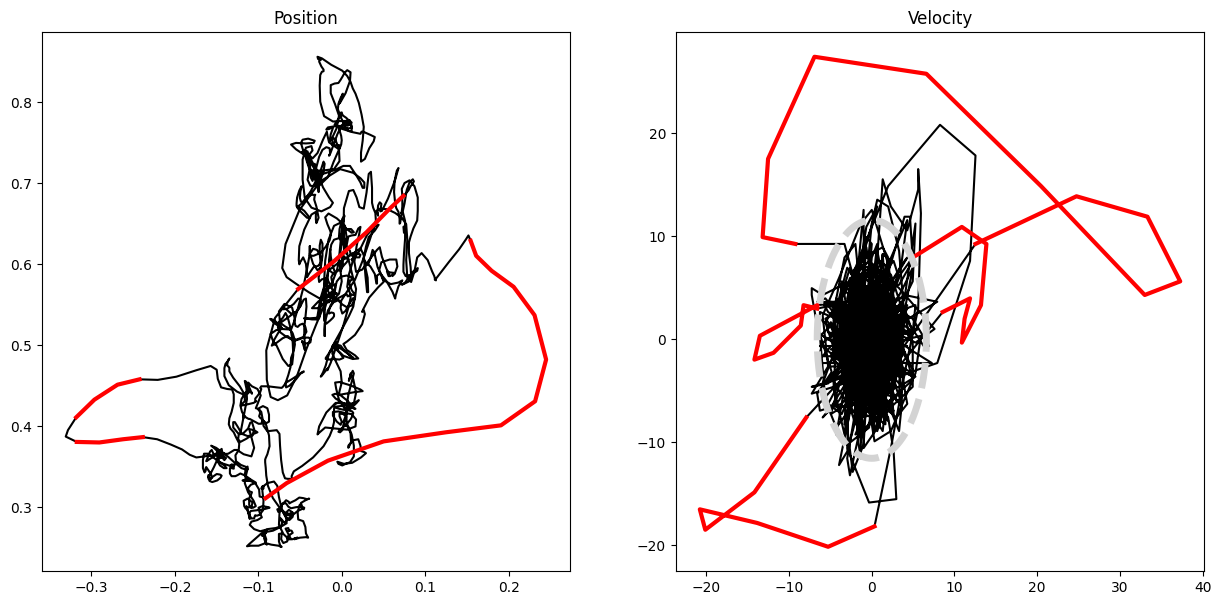

In [84]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(d.xls, d.yls, c="black")
for idx, row in bino.iterrows():
  temp = d.loc[(d["t_real"]>=row["onset_l"]) & (d["t_real"]<=row["end_l"])]
  ax[0].plot(temp.xls, temp.yls, c="red", linewidth=3)
ax[0].set_title("Position")
  
ax[1].plot(d.v_xl, d.v_yl, c="black")
for idx, row in bino.iterrows():
  temp = d.loc[(d["t_real"]>=row["onset_r"]) & (d["t_real"]<=row["end_r"])]
  ax[1].plot(temp.v_xl, temp.v_yl, c="red", linewidth=3)
  
ax[1].plot(cx, cy, c="lightgrey", linestyle="dashed", linewidth=5)
ax[1].set_title("Velocity")

In [85]:
fig.savefig("fig1.png")

# Run Detection for a bunch of Trials

In [56]:
all_list = []
for subj in range(1,6):
  for trial in range(1,6):
    d = pd.read_csv(f"data/f0{subj}.00{trial}.dat", sep="\t", header=None, names=["t", "x_l", "y_l", "x_r", "y_r"])
    right_eye = np.vstack([np.asarray(d.x_r), np.asarray(d.y_r)]).T
    left_eye = np.vstack([np.asarray(d.x_l), np.asarray(d.y_l)]).T
    
    ms_r, rad_r = microsac_detection.microsacc(right_eye)
    ms_l, rad_l = microsac_detection.microsacc(left_eye)
    bino, monol, monor = microsac_detection.binsacc(ms_r, ms_l)
    bino = pd.DataFrame(bino, columns=["onset_l", "end_l", "peakvelocity_l", "horizontalcomponent_l", "verticalcomponent_l","horizontalamplitude_l", "verticalamplitude_l", "onset_r", "end_r", "peakvelocity_r", "horizontalcomponent_r", "verticalcomponent_r","horizontalamplitude_r", "verticalamplitude_r"])
    bino["subj"] = subj
    all_list.append(bino)
    

In [57]:
all_df = pd.concat(all_list, axis=0, ignore_index=True)

In [58]:
all_df["peakvel"] = (all_df["peakvelocity_l"] + all_df["peakvelocity_r"])/2
all_df["ampl"] = (np.sqrt(all_df["horizontalamplitude_l"]**2 + all_df["verticalamplitude_l"]**2) + np.sqrt(all_df["horizontalamplitude_r"]**2 + all_df["verticalamplitude_r"]**2))/2

Text(0, 0.5, 'Peak velocity [deg/s]')

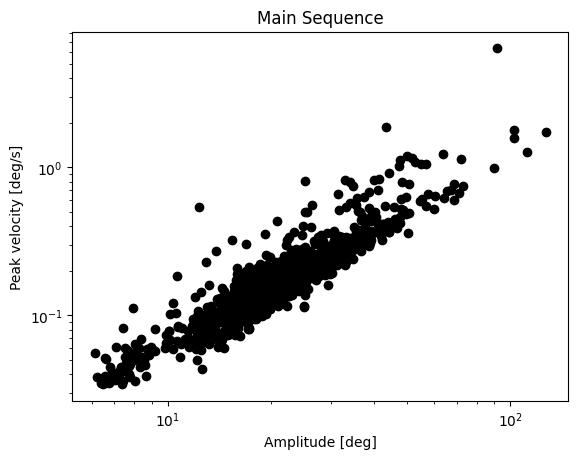

In [68]:
fig, ax = plt.subplots(1,1)
ax.scatter(all_df.peakvel, all_df.ampl, c="black")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Main Sequence")
ax.set_xlabel("Amplitude [deg]")
ax.set_ylabel("Peak velocity [deg/s]")


Text(0, 0.5, 'Peak velocity [deg/s]')

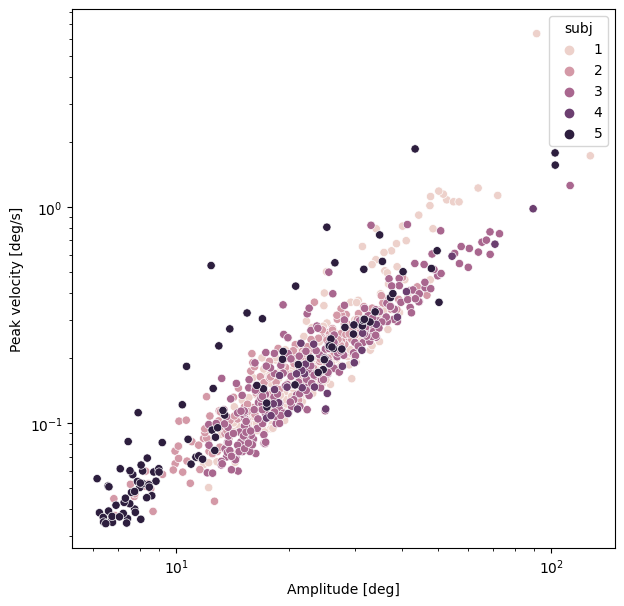

In [69]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(data=all_df, x="peakvel", y="ampl", hue="subj", ax=ax)
ax.set_xlabel("Amplitude [deg]")
ax.set_ylabel("Peak velocity [deg/s]")